In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv('data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
import seaborn as sns

In [3]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_da_us = df_da_us.dropna(subset = 'salary_year_avg')

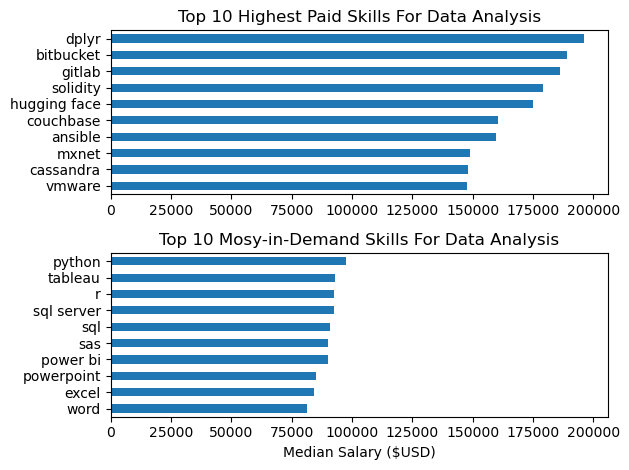

In [4]:
df_da_us = df_da_us.explode('job_skills')
df_da_us[['salary_year_avg','job_skills']]

df_da_us_grp = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_da_top_pay = df_da_us_grp.sort_values(by='median',ascending=False).head(10)
df_da_skills = df_da_us_grp.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)

fig, ax = plt.subplots(2,1)

df_da_top_pay[::-1].plot(kind = 'barh',y = 'median',ax = ax[0], legend = False)
ax[0].set_title('Top 10 Highest Paid Skills For Data Analysis')
ax[0].set_ylabel('')
df_da_skills[::-1].plot(kind = 'barh',y = 'median',ax = ax[1],legend=False)
ax[1].set_title('Top 10 Mosy-in-Demand Skills For Data Analysis')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')

fig.tight_layout()

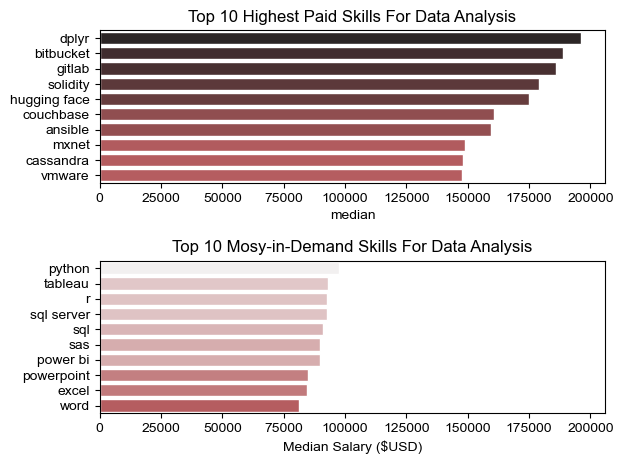

In [14]:
df_da_us = df_da_us.explode('job_skills')
df_da_us[['salary_year_avg','job_skills']]

df_da_us_grp = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_da_top_pay = df_da_us_grp.sort_values(by='median',ascending=False).head(10)
df_da_skills = df_da_us_grp.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)

fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

#df_da_top_pay[::-1].plot(kind = 'barh',y = 'median',ax = ax[0], legend = False)
sns.barplot(data=df_da_top_pay, x='median',y=df_da_top_pay.index, ax=ax[0],hue='median',palette='dark:r_r',legend = False)
ax[0].set_title('Top 10 Highest Paid Skills For Data Analysis')
ax[0].set_ylabel('')

#df_da_skills[::-1].plot(kind = 'barh',y = 'median',ax = ax[1],legend=False)
sns.barplot(data=df_da_skills, x='median',y=df_da_skills.index, ax=ax[1],hue='median',palette='light:r_r',legend=False)
ax[1].set_title('Top 10 Mosy-in-Demand Skills For Data Analysis')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')

fig.tight_layout()

Text(12.444444444444445, 0.5, 'No of Jobs')

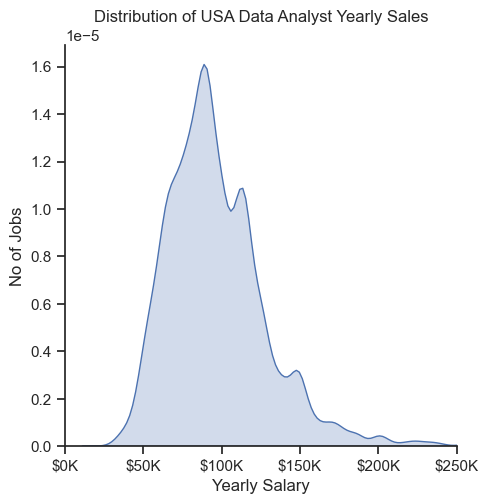

In [21]:
#df_da_us['salary_year_avg'].plot(kind='hist', bins=40,edgecolor = 'black')
sns.displot(data=df_da_us['salary_year_avg'], kind = 'kde',fill=True)
plt.xlim(0,250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

plt.title('Distribution of USA Data Analyst Yearly Sales')
plt.xlabel('Yearly Salary')
plt.ylabel('No of Jobs')